# Data Augmentation with Imgaug

### Imports

In [ ]:
import os
import cv2
import imgaug.augmenters as iaa
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
%cd /content/drive/MyDrive/Datasets

/content/drive/MyDrive/Datasets


### Visualizing few transformations

In [ ]:
def visualize_augmentations(image_path):
    """
    Apply different augmentations to a single image and visualize them.

    Parameters:
    image_path (str): Path to the image to be augmented.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Invalid image path.")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define different augmentation pipelines
    augmenters = {
        "Original": lambda img: img,  # This lambda function doesn't accept keyword arguments
        "Flipped": iaa.Fliplr(1.0),
        "Rotated": iaa.Affine(rotate=30),
        "Blurred": iaa.GaussianBlur(sigma=2.0),
        "Brightness": iaa.Multiply(1.5),
        "Noise": iaa.AdditiveGaussianNoise(scale=50),
        "Cropped": iaa.Crop(percent=(0.2, 0.2, 0.2, 0.2)),
        "Grayscale": iaa.Grayscale(alpha=1.0)
    }

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.flatten()

    for idx, (title, augmenter) in enumerate(augmenters.items()):
        if title == "Original":
            # Call the lambda function without keyword arguments for "Original"
            aug_img = augmenter(image)
        else:
            # Always pass the image as a keyword argument (image=image) for other augmenters
            aug_img = augmenter(image=image)

        axes[idx].imshow(aug_img)
        axes[idx].set_title(title)
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()

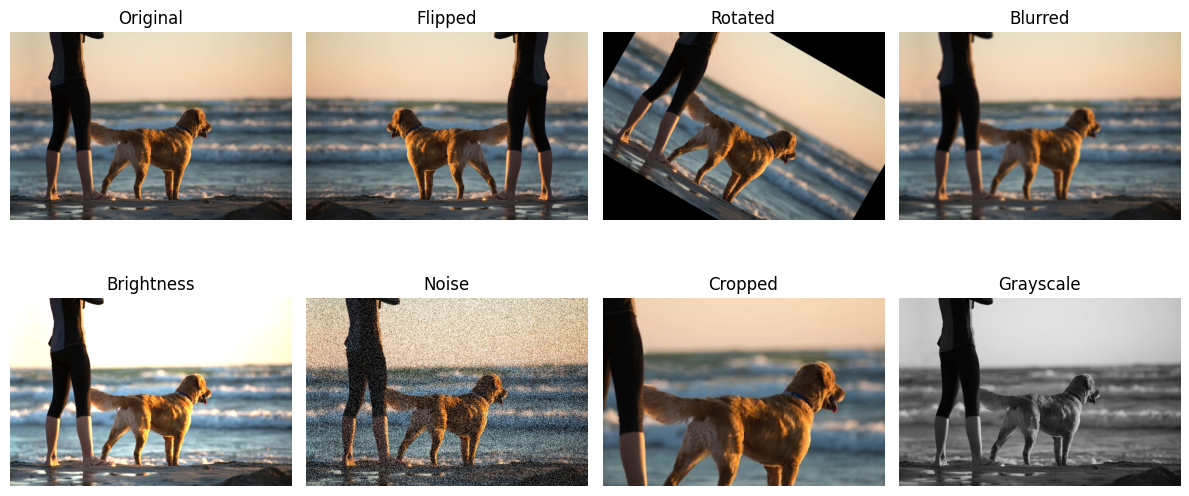

In [ ]:
visualize_augmentations("/content/drive/MyDrive/Datasets/sample_images/pexels-trinitykubassek-313979.jpg")

In [ ]:
def augment_images(input_folder, output_folder, num_augmented_images=100):
    """
    Apply data augmentation to images in the input folder and save the augmented images in the output folder.

    Parameters:
    input_folder (str): Path to the folder containing original images.
    output_folder (str): Path to save augmented images.
    num_augmented_images (int): Total number of augmented images to generate.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load images
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('jpg', 'png', 'jpeg'))]
    images = [cv2.imread(os.path.join(input_folder, f)) for f in image_files]
    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images if img is not None]

    if not images:
        print("No valid images found in the input folder.")
        return

    num_original_images = len(images)
    images_to_generate = max(0, num_augmented_images - num_original_images)
    augmentations_per_image = images_to_generate // num_original_images + 1

    # Define augmentation pipeline
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),  # 50% chance of flipping horizontally
        iaa.Affine(rotate=(-25, 25)),  # Random rotation between -25 and 25 degrees
        iaa.GaussianBlur(sigma=(0, 1.5)),  # Apply Gaussian Blur
        iaa.Multiply((0.8, 1.2)),  # Change brightness
        iaa.AdditiveGaussianNoise(scale=(10, 30)),  # Add Gaussian noise
        iaa.Crop(percent=(0, 0.2)),  # Random cropping
        iaa.Sometimes(0.3, iaa.Grayscale(alpha=(0.0, 1.0)))  # Convert some images to grayscale
    ])

    # Generate augmented images
    augmented_count = 0
    for i, img in enumerate(tqdm(images, desc="Augmenting images")):
        for _ in range(augmentations_per_image):
            if augmented_count >= images_to_generate:
                break
            aug_img = seq(image=img)
            output_filename = f"aug_{i}_{random.randint(1000, 9999)}.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cv2.imwrite(output_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
            augmented_count += 1

    print(f"Generated {augmented_count} augmented images and saved in {output_folder}")

In [ ]:
# Example usage
input_folder = "sample_images"  # Change to your input folder path
output_folder = "output_images"  # Change to your output folder path
augment_images(input_folder, output_folder, num_augmented_images=100)

Augmenting images: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

Generated 94 augmented images and saved in output_images
